In [5]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import illustris_python.groupcat as ilgc
%matplotlib inline

In [18]:
basePath ='/global/project/projectdirs/desi/users/forero/Illustris-3/'
subs3 = ilgc.loadSubhalos(basePath,135,fields=['SubhaloMass', 'SubhaloMassInRadType'])
basePath ='/global/project/projectdirs/desi/users/forero/Illustris-2/'
subs2 = ilgc.loadSubhalos(basePath,135,fields=['SubhaloMass', 'SubhaloMassInRadType'])
basePath ='/global/project/projectdirs/desi/users/forero/Illustris-1/'
subs1 = ilgc.loadSubhalos(basePath,135,fields=['SubhaloMass',  'SubhaloMassInRadType'])

In [26]:
print("DM subhalo min mass")
print('Illustris1', min(subs1['SubhaloMass']))
print('Illustris2', min(subs2['SubhaloMass']))
print('Illustris3',min(subs3['SubhaloMass']))

DM subhalo min mass
Illustris1 0.00105906
Illustris2 0.00968413
Illustris3 0.131521


In [28]:
print("stellar min mass")
ii = subs1['SubhaloMassInRadType'][:,4]>0
print('Illustris1', min(subs1['SubhaloMassInRadType'][ii,4]))
ii = subs2['SubhaloMassInRadType'][:,4]>0
print('Illustris2', min(subs2['SubhaloMassInRadType'][ii,4]))
ii = subs3['SubhaloMassInRadType'][:,4]>0
print('Illustris3', min(subs3['SubhaloMassInRadType'][ii,4]))

stellar min mass
Illustris1 2.97644e-05
Illustris2 0.000182879
Illustris3 0.00112718


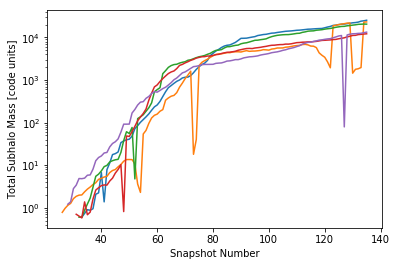

In [3]:
fields = ['SubhaloMass','SubfindID','SnapNum', 'SubhaloMassInRadType']
start = 0
for i in range(start,start+5):
    tree = il.sublink.loadTree(basePath,135,GroupFirstSub[i],fields=fields,onlyMPB=True)
    plt.plot(tree['SnapNum'],tree['SubhaloMass'],'-')
plt.yscale('log')
plt.xlabel('Snapshot Number')
plt.ylabel('Total Subhalo Mass [code units]')

In [4]:
def find_formation_time(sublinktree):
    final_mass = sublinktree['SubhaloMass'][0]
    initial_mass = sublinktree['SubhaloMass'][-1]
    n_points = len(sublinktree['SubhaloMass'])
    formation_snap = -1
    for i in range(n_points-1, -1, -1):
        if sublinktree['SubhaloMass'][i] > final_mass/2.0:
            formation_snap = sublinktree['SnapNum'][i]
            break
    return formation_snap

In [5]:
fields = ['SubhaloMass','SubfindID','SnapNum']
start = 0
n_halos = 5000
formation_time = []
final_mass = []
for i in range(start,start+n_halos):
    tree = il.sublink.loadTree(basePath,135,GroupFirstSub[i],fields=fields,onlyMPB=True)
    formation_time.append(find_formation_time(tree))
    final_mass.append(tree['SubhaloMass'][0])
    

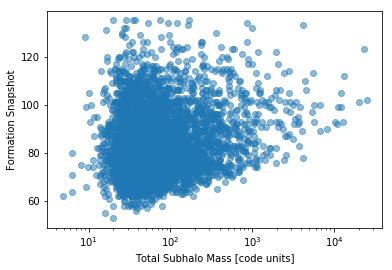

In [6]:
plt.scatter(final_mass, formation_time, alpha=0.5)
plt.ylabel('Formation Snapshot')
plt.xscale('log')
plt.xlabel('Total Subhalo Mass [code units]')

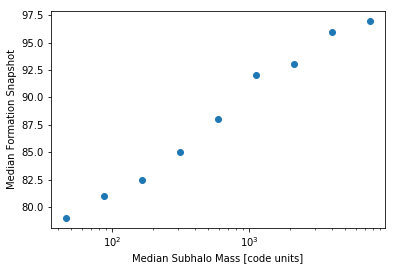

In [7]:
final_mass = np.array(final_mass)
formation_time = np.array(formation_time)

n_bins = 10
mass_bins = np.logspace(1.5,4,n_bins)
median_formation = np.ones(n_bins-1)
for i in range(n_bins-1):
    ii = (final_mass > mass_bins[i]) & (final_mass < mass_bins[i+1])
    median_formation[i] = np.median(formation_time[ii])
    
centered_mass_bin = 0.5*(mass_bins[1:] + mass_bins[0:-1])

plt.scatter(centered_mass_bin, median_formation)
plt.ylabel('Median Formation Snapshot')
plt.xscale('log')
plt.xlabel('Median Subhalo Mass [code units]')

In [8]:
# Stellar masses

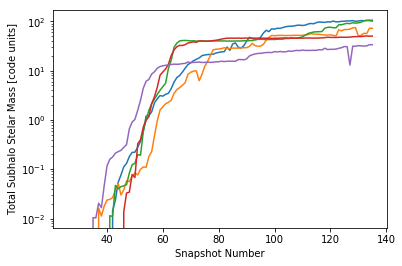

In [9]:
fields = ['SubhaloMass','SubfindID','SnapNum', 'SubhaloMassInRadType']

for i in range(start,start+5):
    tree = il.sublink.loadTree(basePath,135,GroupFirstSub[i],fields=fields,onlyMPB=True)
    plt.plot(tree['SnapNum'],tree['SubhaloMassInRadType'][:,4],'-')
plt.yscale('log')
plt.xlabel('Snapshot Number')
plt.ylabel('Total Subhalo Stelar Mass [code units]')

In [10]:
def find_formation_time_stellar_mass(sublinktree):
    final_mass = sublinktree['SubhaloMassInRadType'][0,4]
    initial_mass = sublinktree['SubhaloMassInRadType'][-1,4]
    n_points = len(sublinktree['SubhaloMassInRadType'][:,4])
    formation_snap = -1
    for i in range(n_points-1, -1, -1):
        if sublinktree['SubhaloMassInRadType'][i,4] > final_mass/2.0:
            formation_snap = sublinktree['SnapNum'][i]
            break
    return formation_snap

In [11]:
fields = ['SubhaloMass','SubfindID','SnapNum', 'SubhaloMassInRadType']
start = 0
n_halos = 5000
formation_time_stellar = []
final_stellar_mass = []
for i in range(start,start+n_halos):
    tree = il.sublink.loadTree(basePath,135,GroupFirstSub[i],fields=fields,onlyMPB=True)
    formation_time_stellar.append(find_formation_time_stellar_mass(tree))
    final_stellar_mass.append(tree['SubhaloMassInRadType'][0,4])

(40, 140)

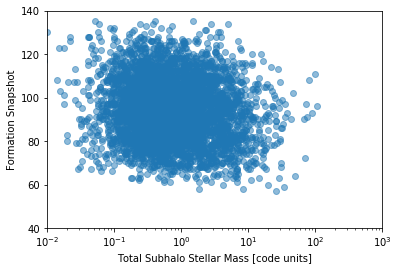

In [13]:
plt.scatter(final_stellar_mass, formation_time_stellar, alpha=0.5)
plt.ylabel('Formation Snapshot')
plt.xscale('log')
plt.xlabel('Total Subhalo Stellar Mass [code units]')
plt.xlim([0.01,1000])
plt.ylim([40,140])

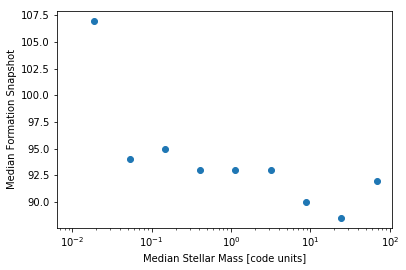

In [14]:
final_stellar_mass = np.array(final_stellar_mass)
formation_time_stellar = np.array(formation_time_stellar)

n_bins = 10
stellar_mass_bins = np.logspace(-2,2,n_bins)
median_formation_stellar = np.ones(n_bins-1)
for i in range(n_bins-1):
    ii = (final_stellar_mass > stellar_mass_bins[i]) & (final_stellar_mass < stellar_mass_bins[i+1])
    median_formation_stellar[i] = np.median(formation_time_stellar[ii])
    
centered_stellar_mass_bin = 0.5*(stellar_mass_bins[1:] + stellar_mass_bins[0:-1])

plt.scatter(centered_stellar_mass_bin, median_formation_stellar)
plt.ylabel('Median Formation Snapshot')
plt.xscale('log')
plt.xlabel('Median Stellar Mass [code units]')
